In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from openpilot_exploration.datasets.simple_dataset import SimpleDataset, SimpleTimeDataset

In [4]:
data = SimpleDataset(path="./output/big_one_dataset/")

In [5]:
simple_time = SimpleTimeDataset(path="./output/big_one_dataset/")
len(simple_time)

31855

In [6]:
len(data)

31856

In [7]:
datalist = []
for image, controls in data:
    steer = controls[0].item()
    throttle = controls[1].item()
    brake = controls[2].item()
    datalist.append({"image": image, "steer": steer, "throttle": throttle, "brake": brake})
df = pd.DataFrame(datalist, columns=["image", "steer", "throttle", "brake"])


In [8]:
df_controls = df[["steer", "throttle", "brake"]]

## Steer

In [9]:
df_controls["steer"].describe()

count    31856.000000
mean        -0.002872
std          0.041611
min         -0.251963
25%         -0.003958
50%          0.000000
75%          0.000440
max          0.369252
Name: steer, dtype: float64

Text(0.5, 0, 'Steering angle value')

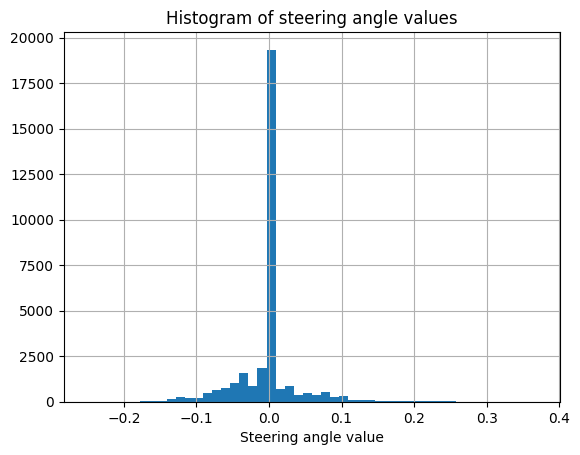

In [35]:
ax = df_controls["steer"].hist(bins=50)
ax.set_title("Histogram of steering angle values")
ax.set_xlabel("Steering angle value")

## Throttle

In [11]:
df_controls["throttle"].describe()

count    31856.000000
mean         0.279167
std          0.216252
min          0.000000
25%          0.000000
50%          0.371484
75%          0.399371
max          0.850000
Name: throttle, dtype: float64

Text(0.5, 0, 'Throttle value')

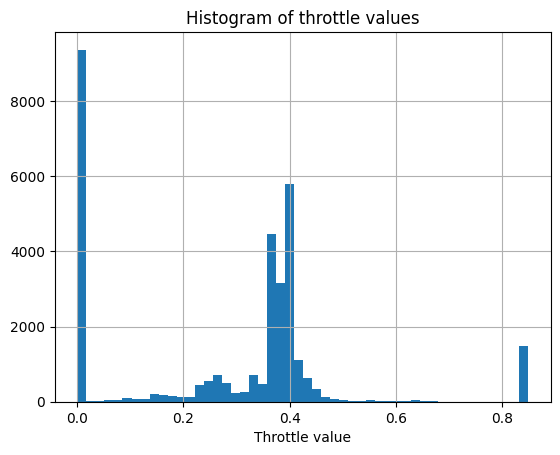

In [36]:
ax = df_controls["throttle"].hist(bins=50)
ax.set_title("Histogram of throttle values")
ax.set_xlabel("Throttle value")

## Brake

In [13]:
df_controls["brake"].describe()

count    31856.000000
mean         0.282716
std          0.448334
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: brake, dtype: float64

Text(0.5, 0, 'Brake value')

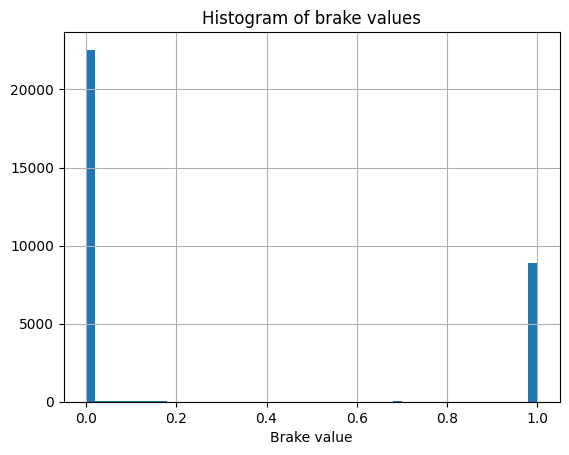

In [37]:
ax = df_controls["brake"].hist(bins=50)
ax.set_title("Histogram of brake values")
ax.set_xlabel("Brake value")

## Samples

The images in the normal dataset are not processed, the images in the SimpleTimeDataset are resized to 256*128 and then concatenated with the last image in the sequence along the channels for a 256*128*6 image tensor.

In [24]:
def plot_sample(index: int):
    steer = df["steer"][index]
    throttle = df["throttle"][index]
    brake = df["brake"][index]
    image = df["image"][index]
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Steer: {steer:.4f}, Throttle: {throttle:.4f}, Brake: {brake:.4f}")

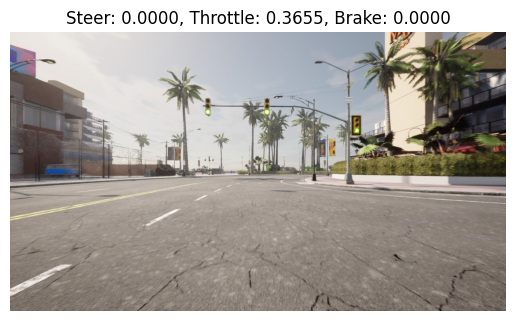

In [29]:
plot_sample(100)

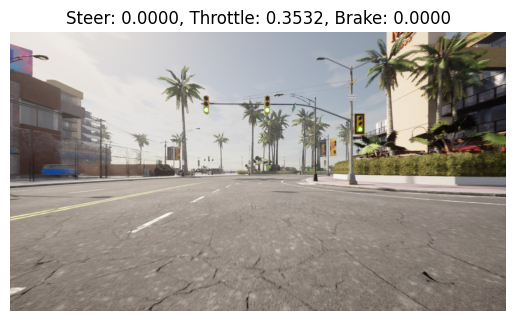

In [30]:
plot_sample(101)

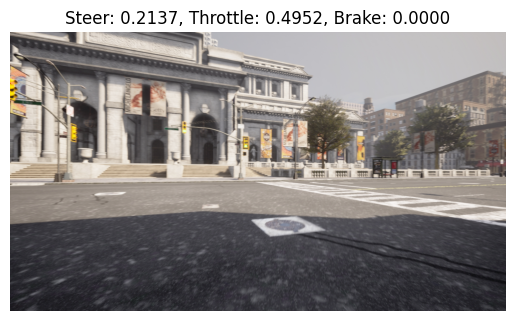

In [32]:
plot_sample(1100)

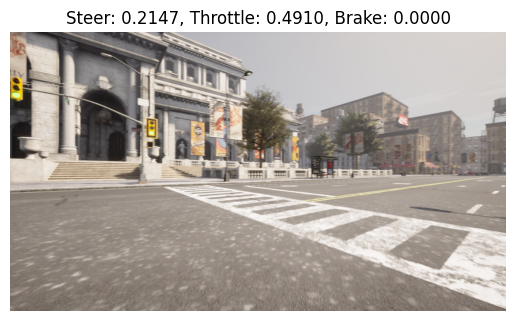

In [33]:
plot_sample(1110)